# Read Training results

## Python 2

In [1]:
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import pickle
import datetime
import os
import matplotlib

In [2]:
KTH = (0.062, 0.313, 0.654)
KTH2 = (0.615, 0.062, 0.172)

In [3]:
import matplotlib.pyplot as plt

# Final simulations: Big Run

In [4]:
best = ['Mumps','carbuncle','coccydynia','tympanic membrane perforation','dyshidrosis',\
       'spondylosis','schizoaffective disorder','breast dysplasia','ganglion','Uterine polyp']
worst = ['Bleeding','body temperature increased','emesis','disorder Renal','leucopenia',\
        'diarrhea','icterus','nausea','itch','anaemia']
sims = ['AUROC','AUPRC','Accuracy']
n_sims = len(sims)

In [5]:
f0 = 'results_training/TRAIN_real_genes_19081_drugs_639_se_964_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'

In [6]:
with open(f0, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb\n')
print('The average performances for test are:')
test_big = test_metrics
avg_big = np.average(test_big,axis=0)
print('AUROC: ',"{:.4f}".format(avg_big[0]),'\tAUPRC: ',"{:.4f}".format(avg_big[1]),\
      '\tAccuracy: ',"{:.4f}".format(avg_big[2]))
print('The standard deviation of performances for test are:')
std_big = np.std(test_big,axis=0)
print('AUROC: ',"{:.4f}".format(std_big[0]),'\tAUPRC: ',"{:.4f}".format(std_big[1]),\
      '\tAccuracy: ',"{:.4f}".format(std_big[2]))

train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


Train Time: 20 days, 21:33:46.738121
Virtual Memory: 204.833660928 Gb
RSS Memory: 147.491414016 Gb

The average performances for test are:
AUROC:  0.8482 	AUPRC:  0.7528 	Accuracy:  0.7491
The standard deviation of performances for test are:
AUROC:  0.0200 	AUPRC:  0.0323 	Accuracy:  0.0260


In [7]:
# Name of each side effect
r = 0
ind2name = {}
name2ind = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        ind2name[r] = edge2name[i,j][k]
        name2ind[ind2name[r]] = r
        r += 1

Text(0.5,1,'Frequency of performances')

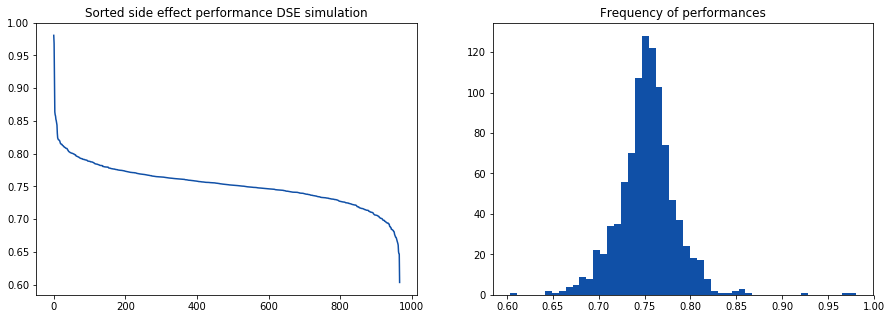

In [45]:
# Sort side effects by performance
idx =np.reshape(np.arange(len(ind2name)),[-1,1])
auprc = np.concatenate([idx,np.reshape(test_big[:,1],[-1,1])],axis=1)
auprc = auprc[auprc[:,1].argsort()[::-1]]
sorted_idx = auprc[:,0].astype(int)
n_se=10
last_base_idx = sorted_idx[-n_se:]
best_base_idx = sorted_idx[:n_se+3]
best_base_idx = best_base_idx[(best_base_idx!=0)&(best_base_idx!=1)&(best_base_idx!=2)]
last = sorted_idx[-n_se:][::-1]
fig,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].plot(auprc[:,1],color=KTH)
ax[0].set_title('Sorted side effect performance DSE simulation')
ax[1].hist(auprc[:,1],bins=50,color=KTH)
ax[1].set_title('Frequency of performances')

In [46]:
print(best_base_idx)
best_base = [ind2name[x] for x in best_base_idx]
print(best_base)
print(last_base_idx)
last_base = [ind2name[x] for x in last_base_idx]
print(last_base)

[873 878 799 812 861 837 963 826 771 686]
[u'paraparesis', u'hypogonadism', u'proctitis', u'apraxia', u'encephalitis viral', u'Pneumocystis carinii pneumonia', u'neonatal respiratory distress syndrome', u'intraocular inflammation', u'food intolerance', u'bad breath']
[780 959 876 720 941 853 875 926 755 746]
[u'Breast cyst', u'carbuncle', u'atrophy of skin', u'Vitreous haemorrhage', u'hypermetropia', u'hair disease', u'Skin Striae', u'fracture nonunion', u'perirectal abscess', u'myasthenia gravis']


In [47]:
print(np.shape(test_big))
print(test_big[3:,1].shape,np.reshape(np.arange(len(ind2name)-3),[-1,1]).shape)

(967, 3)
(964,) (964, 1)


In [50]:
auprc = np.concatenate([idx,np.reshape(test_dse[3:,1],[-1,1])],axis=1) # cat idx with AUPRC
auprc = auprc[auprc[:,1].argsort()[::-1]] # Sort by AUPRC
sorted_idx = auprc[:,0].astype(int) # Idx sorted by AUPRC
fig,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].plot(auprc[:,1])
ax[0].set_title('Sorted side effect performance DSE simulation')
ax[1].hist(auprc[:,1],bins=50)
ax[0].set_title('Frequency of performances')

ValueError: all the input array dimensions except for the concatenation axis must match exactly

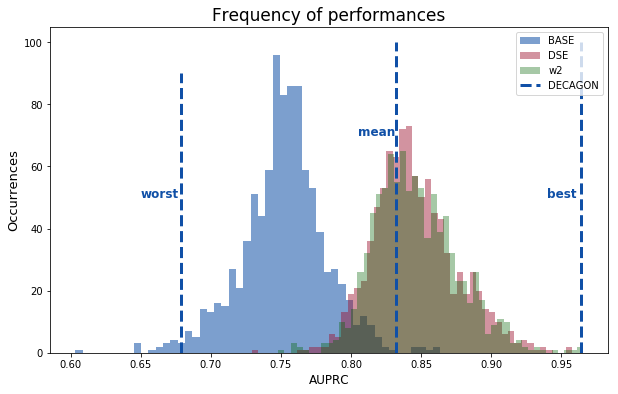

In [51]:
# Sort side effects by performance
idx =np.reshape(np.arange(len(ind2name)-3),[-1,1])
auprc1 = np.concatenate([idx,np.reshape(test_big[3:,1],[-1,1])],axis=1)
auprc2 = np.concatenate([idx,np.reshape(test_dse[3:,1],[-1,1])],axis=1) # cat idx with AUPRC
auprc3 = np.concatenate([idx,np.reshape(test_w2[3:,1],[-1,1])],axis=1)
fig,ax = plt.subplots(figsize=[10,6])
ax.hist(auprc1[:,1],bins=50,color=KTH,alpha=0.55,label='BASE')
ax.hist(auprc2[:,1],bins=50,color=KTH2,alpha=0.45,label='DSE')
ax.hist(auprc3[:,1],bins=50,color='darkgreen',alpha=0.35,label='w2')
ax.set_title('Frequency of performances',fontsize=17)
ax.set_xlabel('AUPRC',fontsize=12)
ax.set_ylabel('Occurrences',fontsize=13)
ax.vlines(0.679,0,90,linestyles='--',linewidth=3,color=KTH,label='DECAGON')
ax.text(0.65,50,'worst',color=KTH,fontsize=12,fontweight = 'bold')
ax.vlines(0.832,0,100,linestyles='--',linewidth=3,color=KTH)
ax.text(0.805,70,'mean',color=KTH,fontsize=12,fontweight = 'bold')
ax.vlines(0.964,0,100,linestyles='--',linewidth=3,color=KTH)
ax.text(0.94,50,'best',color=KTH,fontsize=12,fontweight = 'bold')
ax.legend()
plt.savefig('final_histogram.pdf')

In [11]:
ind_best = []
ind_worst = []
for i in range(len(best)):
    ind_best.append(name2ind[best[i]])
    ind_worst.append(name2ind[worst[i]])

### Non-side effect edges

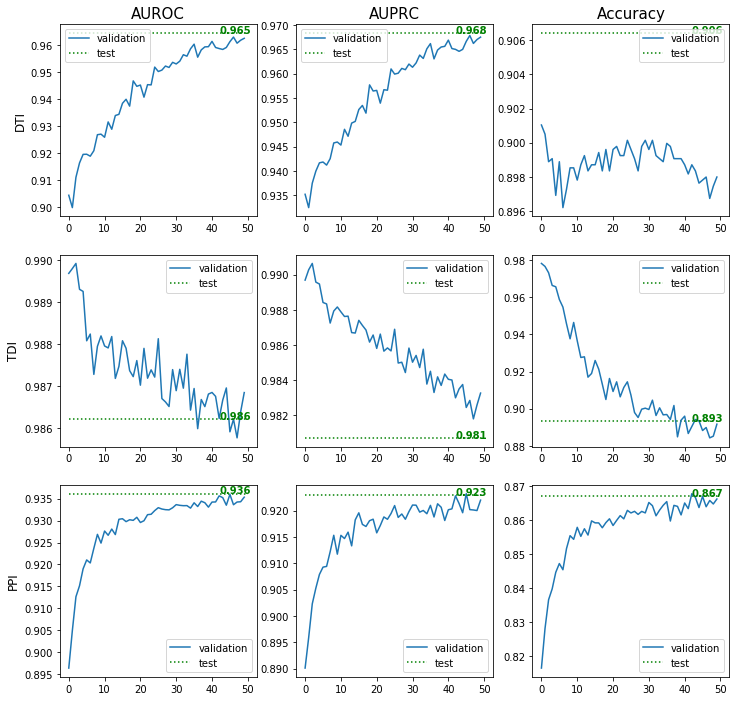

In [12]:
fig,ax = plt.subplots(3,n_sims,figsize=[4*n_sims,12])
for i in range(3):
    for j in range(n_sims):
        if i==0:
            ax[i,j].set_title(sims[j],fontsize=15)
        ax[i,j].plot(val_metrics[:,i,j],label='validation')
        ax[i,j].hlines(test_metrics[i,j],0,50, 'g', linestyles='dotted', label='test')
        ax[i,j].text(42,test_metrics[i,j],"{:.3f}".format(test_metrics[i,j]),color='green',\
                     fontsize=10,fontweight = 'bold')
        if j==0:
            ax[i,j].set_ylabel(ind2name[i],fontsize=12)
        ax[i,j].legend(loc='best')

### Best performing edges (according to paper)

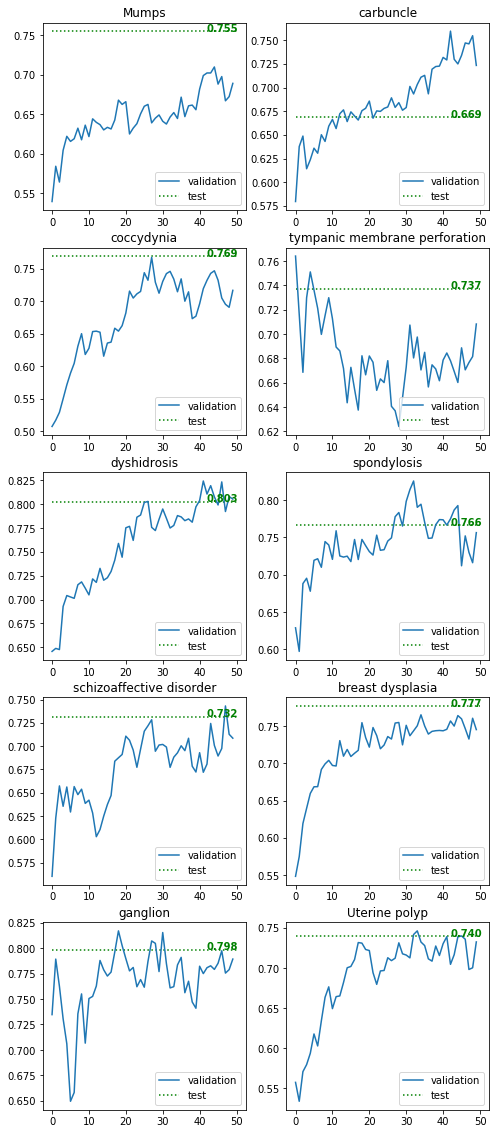

In [13]:
n_se = len(best)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_best[i_c]
        ax[i,j].set_title(best[i_c],fontsize=12)
        ax[i,j].plot(val_metrics[:,I,1],label='validation')
        ax[i,j].hlines(test_metrics[I,1],0,50, 'g', linestyles='dotted', label='test')
        ax[i,j].text(42,test_metrics[I,1],"{:.3f}".format(test_metrics[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='lower right')

### Worst performing edges

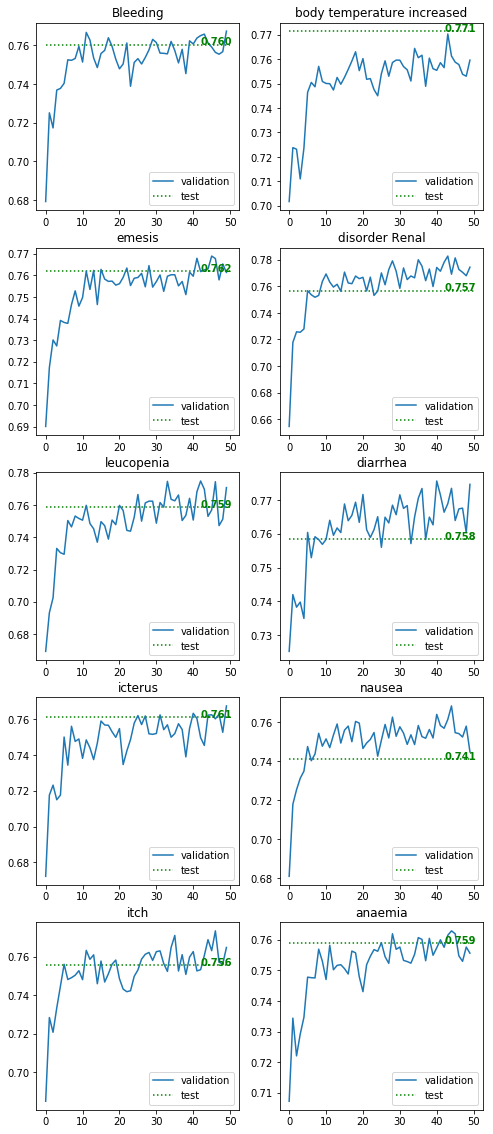

In [14]:
n_se = len(worst)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_worst[i_c]
        ax[i,j].set_title(worst[i_c],fontsize=12)
        ax[i,j].plot(val_metrics[:,I,1],label='validation')
        ax[i,j].hlines(test_metrics[I,1],0,50, 'g', linestyles='dotted', label='test')
        ax[i,j].text(42,test_metrics[I,1],"{:.3f}".format(test_metrics[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='lower right')

# Final simulations: minibatch for DSE & w2

In [17]:
mini = 'data/data_structures/MINIBATCH/MINIBATCH_real_genes_16837_drugs_639_se_964_batchsize_512_valsize_0.15'

In [18]:
# Minibatch import
with open(mini, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
del minibatch
print('minibatch deleted successfully')
print('\n')
print('Minibatch creation time:',datetime.timedelta(seconds=mb_time))
print('Virtual Memory:',mb_vms*1e-9,'Gb')
print('RSS Memory:',mb_rss*1e-9,'Gb\n')

mb_vms Imported successfully
minibatch Imported successfully
mb_time Imported successfully
mb_rss Imported successfully
minibatch deleted successfully


Minibatch creation time: 10:47:42.428442
Virtual Memory: 4.331196416 Gb
RSS Memory: 1.607479296 Gb



# Final simulations: DSE

In [15]:
f1 = 'results_training/TRAIN_real_DSE_9702_genes_16837_drugs_639_se_964_epochs_50_dropout_0.1_valsize_0.15'
ds1 = 'data/data_structures/DECAGON/DECAGON_real_DSE_9702_genes_16837_drugs_639_se_964'

In [16]:
# DECAGON file for DSE
with open(ds1, 'rb') as f:
    DS = pickle.load(f)
    edge2name = DS['edge2name']
    print("edge2name Imported successfully")
# Name of each side effect
r = 0
ind2name = {}
name2ind = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        ind2name[r] = edge2name[i,j][k]
        name2ind[ind2name[r]] = r
        r += 1

edge2name Imported successfully


In [17]:
ind_best = []
ind_worst = []
for i in range(len(best)):
    ind_best.append(name2ind[best[i]])
    ind_worst.append(name2ind[worst[i]])

In [49]:
with open(f1, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
val_dse = val_metrics
train_dse = train_metrics
test_dse = test_metrics
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb\n')
print('Epochs: ',epoch)
print('The average performances for test are:')
avg_dse = np.average(test_dse,axis=0)
print('AUROC: ',"{:.4f}".format(avg_dse[0]),'\tAUPRC: ',"{:.4f}".format(avg_dse[1]),\
      '\tAccuracy: ',"{:.4f}".format(avg_dse[2]))
print('The standard deviation of performances for test are:')
std_dse = np.std(test_dse,axis=0)
print('AUROC: ',"{:.4f}".format(std_dse[0]),'\tAUPRC: ',"{:.4f}".format(std_dse[1]),\
      '\tAccuracy: ',"{:.4f}".format(std_dse[2]))

train_metrics Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


Train Time: 38 days, 12:12:01.154338
Virtual Memory: 194.098241536 Gb
RSS Memory: 156.736843776 Gb

Epochs:  50
The average performances for test are:
AUROC:  0.8956 	AUPRC:  0.8460 	Accuracy:  0.8321
The standard deviation of performances for test are:
AUROC:  0.0181 	AUPRC:  0.0307 	Accuracy:  0.0191


Text(0.5,1,'Frequency of performances')

<Figure size 432x288 with 0 Axes>

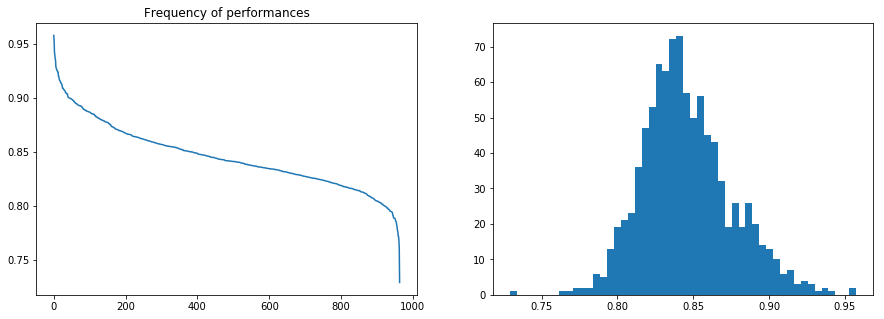

In [19]:
plt.savefig('6w_AUPRC.pdf')# Sort side effects by performance
idx =np.reshape(np.arange(len(ind2name)-3),[-1,1]) # array of indices
auprc = np.concatenate([idx,np.reshape(test_dse[3:,1],[-1,1])],axis=1) # cat idx with AUPRC
auprc = auprc[auprc[:,1].argsort()[::-1]] # Sort by AUPRC
sorted_idx = auprc[:,0].astype(int) # Idx sorted by AUPRC
n_se=10
last_dse_idx = sorted_idx[-n_se:]
best_dse_idx = sorted_idx[:n_se+3]
best_dse_idx = best_dse_idx[(best_dse_idx!=0)&(best_dse_idx!=1)&(best_dse_idx!=2)]
fig,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].plot(auprc[:,1])
ax[0].set_title('Sorted side effect performance DSE simulation')
ax[1].hist(auprc[:,1],bins=50)
ax[0].set_title('Frequency of performances')

In [20]:
print(best_dse_idx)
best_dse = [ind2name[x] for x in best_dse_idx]
print(best_dse)

[904 956 941 920 911 921 957 946 897 954 813 759 923]
[u'soft tissue injuries', u'MPD', u'hypermetropia', u'Hepatitis A', u'bronchiolitis', u'mycosis fungoides', u'methaemoglobinaemia', u'splenectomy', u'hordeolum', u'chicken pox', u'Anal fistula', u'polymyositis', u'Mumps']


In [21]:
print(last_dse_idx)
last_dse = [ind2name[x] for x in last_dse_idx]
print(last_dse)

[ 71 273 265 699  93 491 850 364 953 863]
[u'arteriosclerotic heart disease', u'Blepharospasm', u'Blood Calcium Increased', u'atrial septal defect', u'Embolism pulmonary', u'glucosuria', u'dermatomyositis', u'sensory disturbance', u'balanitis', u'autonomic neuropathy']


### Non-side effect edges

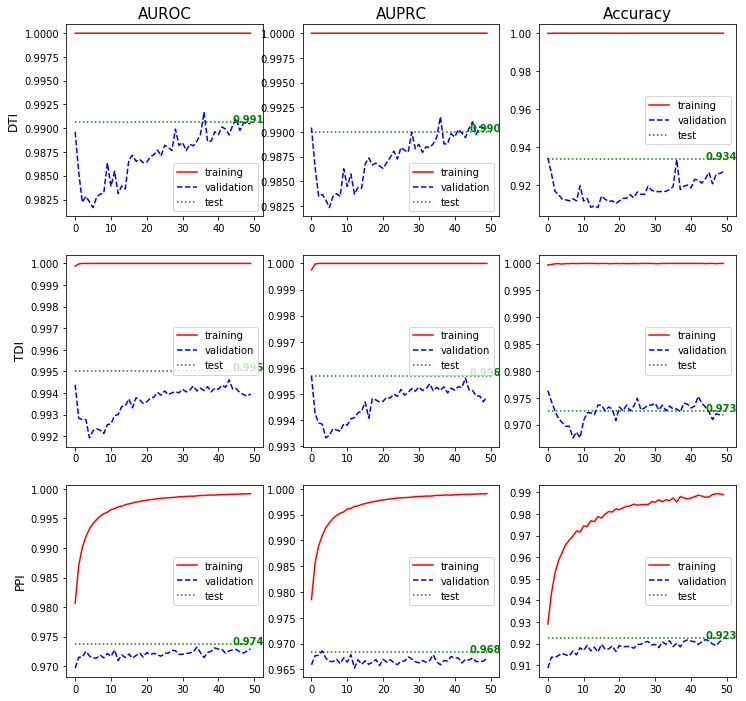

In [22]:
fig,ax = plt.subplots(3,n_sims,figsize=[4*n_sims,12])
for i in range(3):
    for j in range(n_sims):
        if i==0:
            ax[i,j].set_title(sims[j],fontsize=15)
        ax[i,j].plot(train_dse[:,i,j],'r-',label='training')
        ax[i,j].plot(val_dse[:,i,j],'b--',label='validation')
        ax[i,j].hlines(test_dse[i,j],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-6,test_dse[i,j],"{:.3f}".format(test_dse[i,j]),color='green',\
                     fontsize=10,fontweight = 'bold')
        if j==0:
            ax[i,j].set_ylabel(ind2name[i],fontsize=12)
        ax[i,j].legend(loc='best')

### Best performing edges

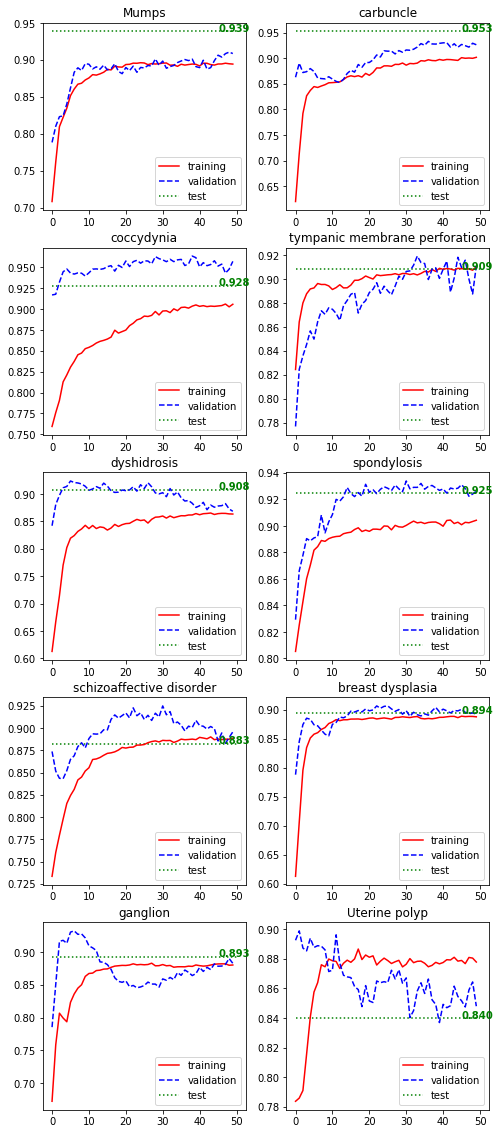

In [23]:
n_se = len(best)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_best[i_c]
        ax[i,j].set_title(best[i_c],fontsize=12)
        ax[i,j].plot(train_dse[:,I,1],'r-',label='training')
        ax[i,j].plot(val_dse[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_dse[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_dse[I,1],"{:.3f}".format(test_dse[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Top 10 in DSE

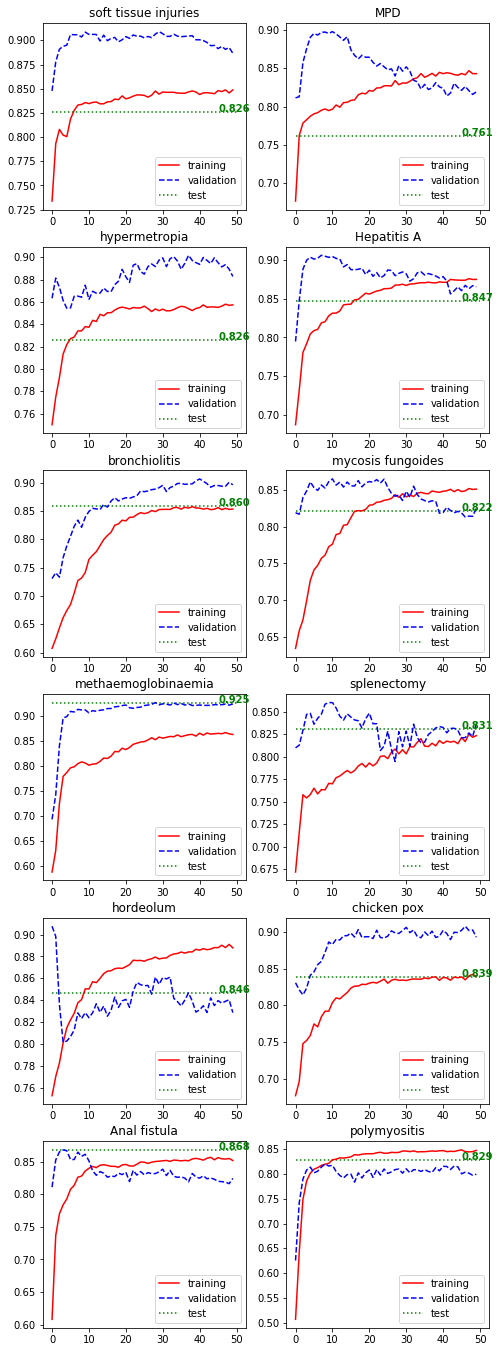

In [24]:
n_se = len(best_dse)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = best_dse_idx[i_c]
        ax[i,j].set_title(best_dse[i_c],fontsize=12)
        ax[i,j].plot(train_dse[:,I,1],'r-',label='training')
        ax[i,j].plot(val_dse[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_dse[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_dse[I,1],"{:.3f}".format(test_dse[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Worst performing edges

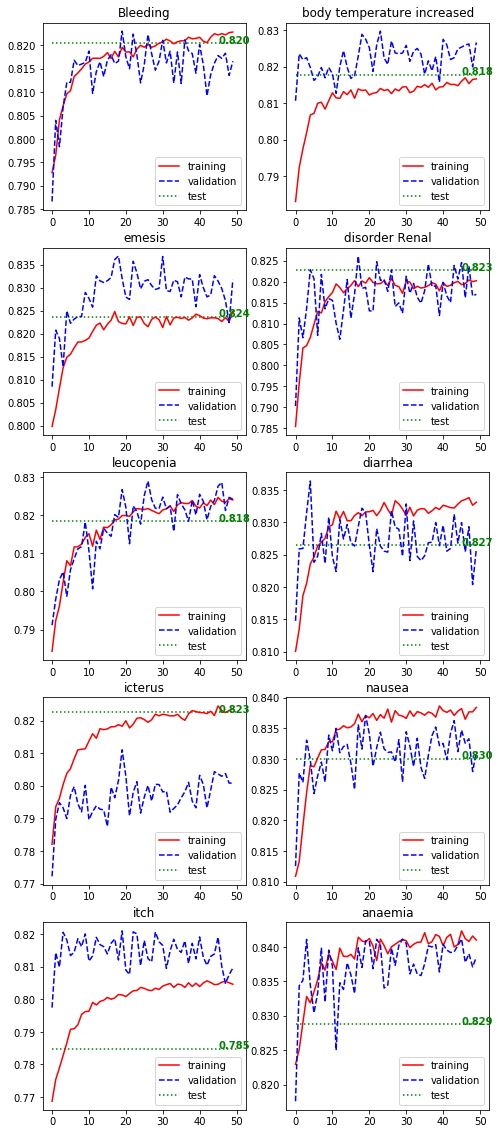

In [25]:
n_se = len(worst)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_worst[i_c]
        ax[i,j].set_title(worst[i_c],fontsize=12)
        ax[i,j].plot(train_dse[:,I,1],'r-',label='training')
        ax[i,j].plot(val_dse[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_dse[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_dse[I,1],"{:.3f}".format(test_dse[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Bottom 10 performances for DSE

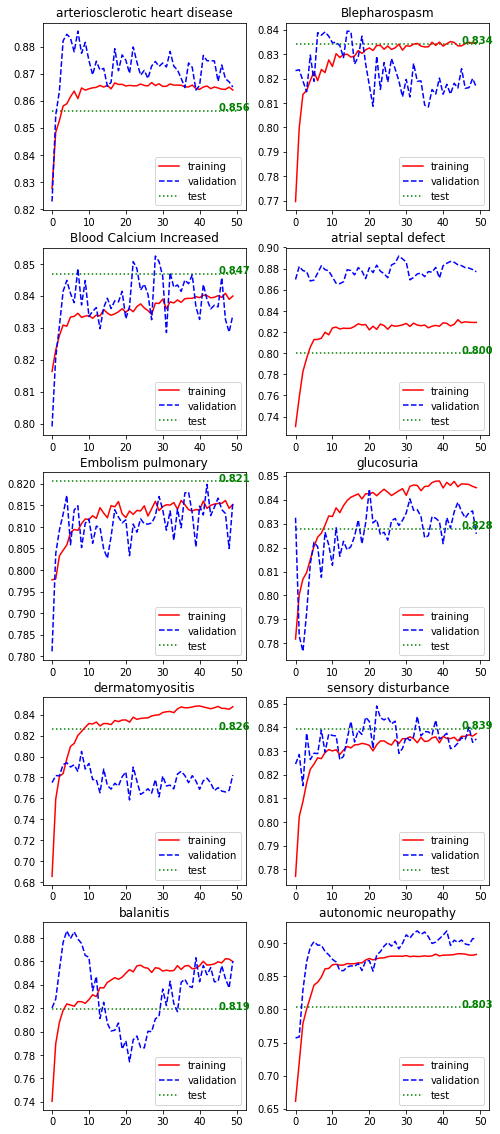

In [26]:
n_se = len(last_dse)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = last_dse_idx[i_c]
        ax[i,j].set_title(last_dse[i_c],fontsize=12)
        ax[i,j].plot(train_dse[:,I,1],'r-',label='training')
        ax[i,j].plot(val_dse[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_dse[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_dse[I,1],"{:.3f}".format(test_dse[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

# Final Simulations: w2

In [27]:
f2 = 'results_training/TRAIN_real_DSE_9702_BDM_genes_16837_drugs_639_se_964_epochs_50_dropout_0.1_valsize_0.15'
ds2 = 'data/data_structures/DECAGON/DECAGON_real_DSE_9702_BDM_genes_16837_drugs_639_se_964'

In [28]:
# DECAGON file for w2
with open(ds2, 'rb') as f:
    DS = pickle.load(f)
    edge2name = DS['edge2name']
    print("edge2name Imported successfully")
# Name of each side effect
r = 0
ind2name = {}
name2ind = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        ind2name[r] = edge2name[i,j][k]
        name2ind[ind2name[r]] = r
        r += 1

edge2name Imported successfully


In [29]:
ind_best = []
ind_worst = []
for i in range(len(best)):
    ind_best.append(name2ind[best[i]])
    ind_worst.append(name2ind[worst[i]])

In [30]:
with open(f2, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
val_w2 = val_metrics
train_w2 = train_metrics
test_w2 = test_metrics
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb\n')
print('Epochs: ',epoch)
print('The average performances for test are:')
avg_w2 = np.average(test_w2,axis=0)
print('AUROC: ',"{:.4f}".format(avg_w2[0]),'\tAUPRC: ',"{:.4f}".format(avg_w2[1]),\
      '\tAccuracy: ',"{:.4f}".format(avg_w2[2]))
print('The standard deviation of performances for test are:')
std_w2 = np.std(test_w2,axis=0)
print('AUROC: ',"{:.4f}".format(std_w2[0]),'\tAUPRC: ',"{:.4f}".format(std_w2[1]),\
      '\tAccuracy: ',"{:.4f}".format(std_w2[2]))

train_metrics Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


Train Time: 40 days, 14:29:08.084291
Virtual Memory: 195.053756416 Gb
RSS Memory: 141.029003264 Gb

Epochs:  50
The average performances for test are:
AUROC:  0.8942 	AUPRC:  0.8464 	Accuracy:  0.8300
The standard deviation of performances for test are:
AUROC:  0.0182 	AUPRC:  0.0308 	Accuracy:  0.0185


Text(0.5,1,'Frequency of performances')

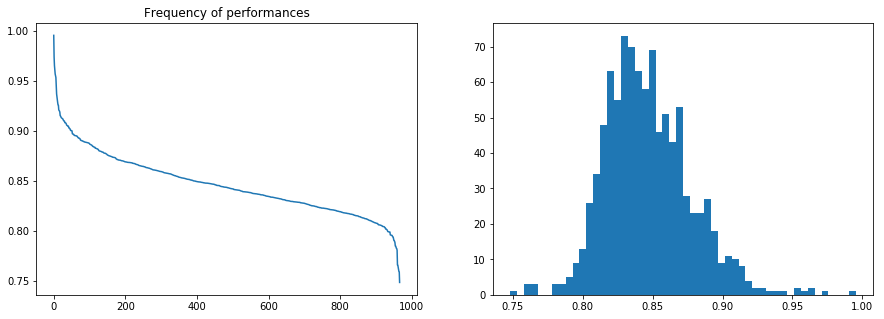

In [31]:
# Sort side effects by performance
idx =np.reshape(np.arange(len(ind2name)),[-1,1])
auprc = np.concatenate([idx,np.reshape(test_w2[:,1],[-1,1])],axis=1)
auprc = auprc[auprc[:,1].argsort()[::-1]]
sorted_idx = auprc[:,0].astype(int)
n_se=10
last_w2_idx = sorted_idx[-n_se:]
best_w2_idx = sorted_idx[:n_se+3]
best_w2_idx = best_w2_idx[(best_w2_idx!=0)&(best_w2_idx!=1)&(best_w2_idx!=2)]
fig,ax = plt.subplots(1,2,figsize=[15,5])
ax[0].plot(auprc[:,1])
ax[0].set_title('Sorted side effect performance DSE simulation')
ax[1].hist(auprc[:,1],bins=50)
ax[0].set_title('Frequency of performances')

In [32]:
print(best_w2_idx)
best_w2 = [ind2name[x] for x in best_w2_idx]
print(best_w2)

[960 762 959 944 907 900 926 864 542 874]
[u'coccydynia', u'Cystitis Interstitial', u'carbuncle', u'oophorectomy', u'substance abuse', u'carcinoma of the cervix', u'fracture nonunion', u'tympanic membrane perforation', u'tendon injury', u'defaecation urgency']


In [33]:
print(last_w2_idx)
last_w2 = [ind2name[x] for x in last_w2_idx]
print(last_w2)

[817 934 815 683 956 836 734 871 853 930]
[u'congenital heart disease', u'swollen scrotum', u'lichen planus', u'Alcoholic intoxication', u'MPD', u'ventricular septal defect', u'hepatitis B', u'night cramps', u'hair disease', u'panniculitis']


### Non-side effect edges

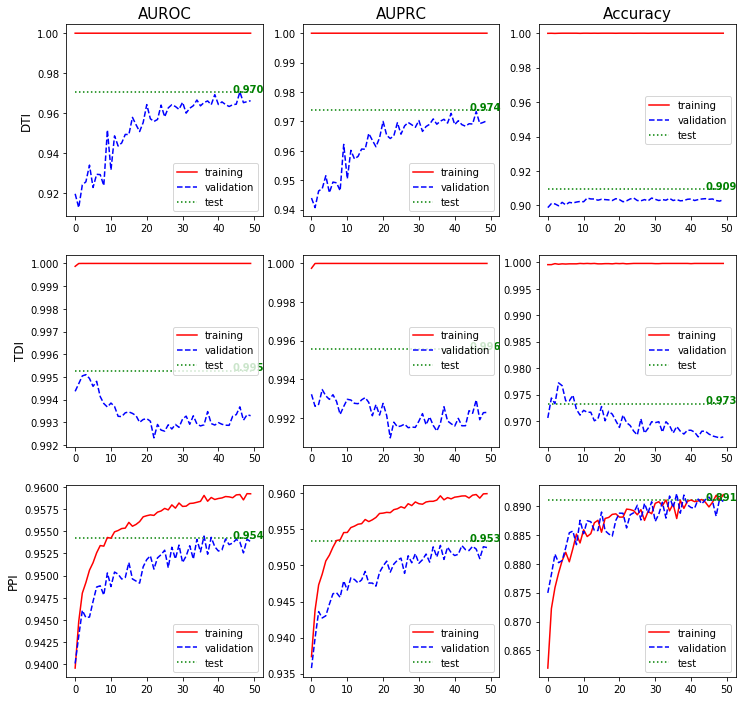

In [34]:
fig,ax = plt.subplots(3,n_sims,figsize=[4*n_sims,12])
for i in range(3):
    for j in range(n_sims):
        if i==0:
            ax[i,j].set_title(sims[j],fontsize=15)
        ax[i,j].plot(train_w2[:,i,j],'r-',label='training')
        ax[i,j].plot(val_w2[:,i,j],'b--',label='validation')
        ax[i,j].hlines(test_w2[i,j],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-6,test_w2[i,j],"{:.3f}".format(test_w2[i,j]),color='green',\
                     fontsize=10,fontweight = 'bold')
        if j==0:
            ax[i,j].set_ylabel(ind2name[i],fontsize=12)
        ax[i,j].legend(loc='best')

### Best perfroming edges

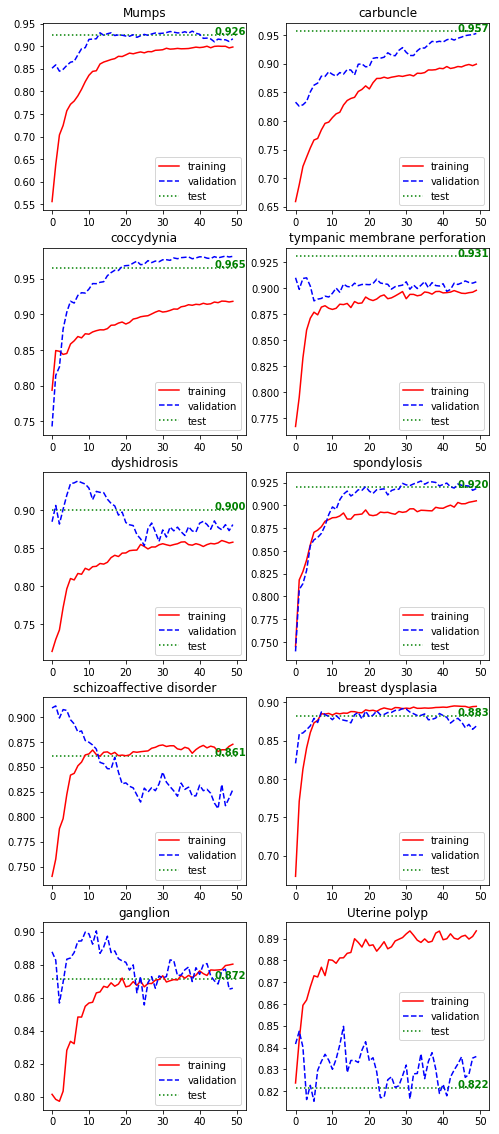

In [35]:
n_se = len(best)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_best[i_c]
        ax[i,j].set_title(best[i_c],fontsize=12)
        ax[i,j].plot(train_w2[:,I,1],'r-',label='training')
        ax[i,j].plot(val_w2[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_w2[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-6,test_w2[I,1],"{:.3f}".format(test_w2[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Top 10 performances w2

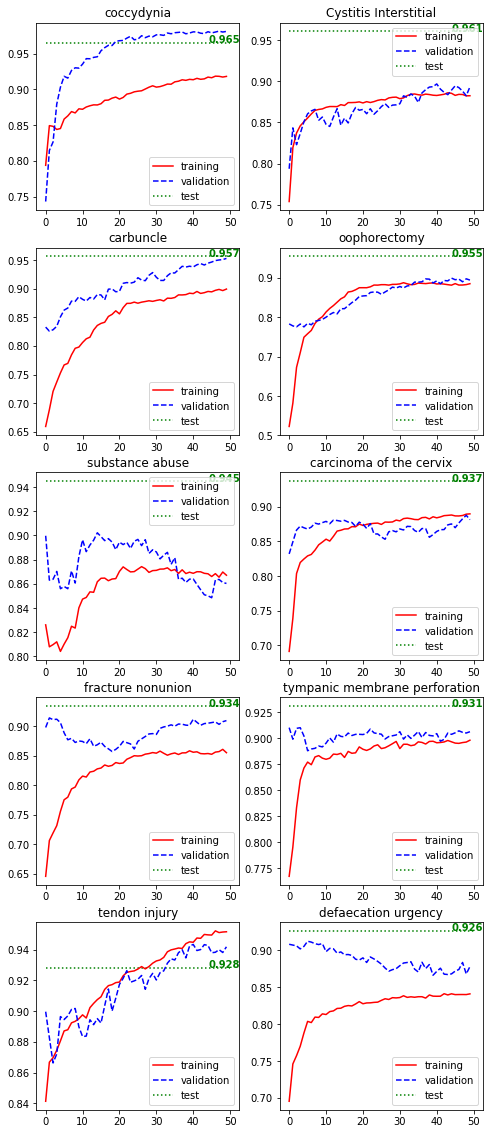

In [36]:
n_se = len(best_w2)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = best_w2_idx[i_c]
        ax[i,j].set_title(best_w2[i_c],fontsize=12)
        ax[i,j].plot(train_w2[:,I,1],'r-',label='training')
        ax[i,j].plot(val_w2[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_w2[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-6,test_w2[I,1],"{:.3f}".format(test_w2[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Worst performing edges

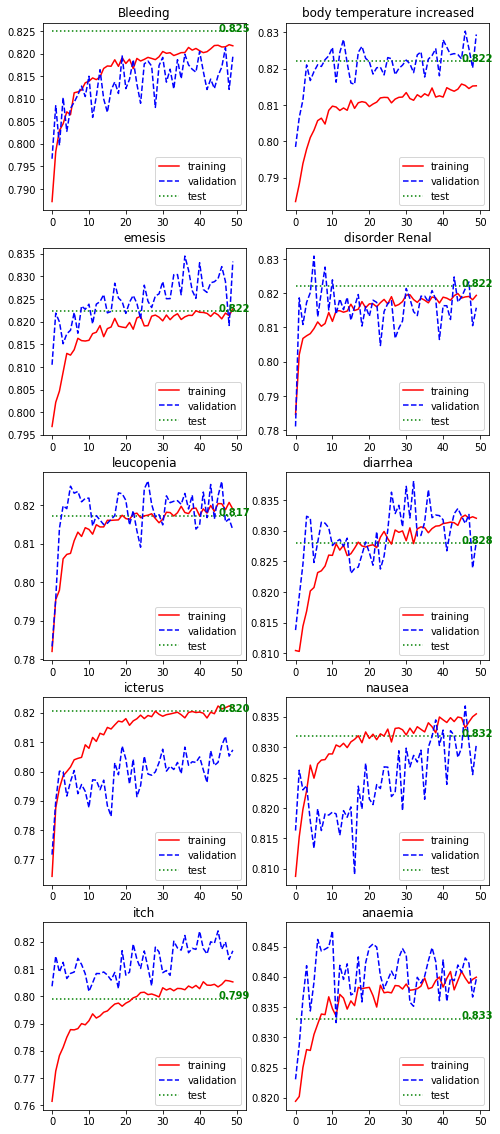

In [37]:
n_se = len(worst)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_worst[i_c]
        ax[i,j].set_title(worst[i_c],fontsize=12)
        ax[i,j].plot(train_metrics[:,I,1],'r-',label='training')
        ax[i,j].plot(val_metrics[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_w2[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_w2[I,1],"{:.3f}".format(test_w2[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Bottom 10 performances w2

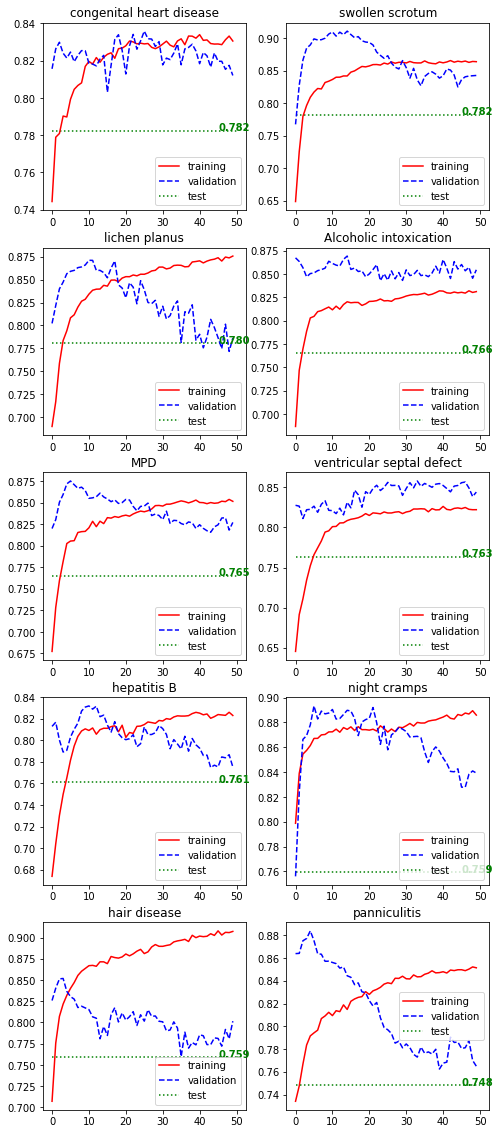

In [38]:
n_se = len(last_w2)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = last_w2_idx[i_c]
        ax[i,j].set_title(last_w2[i_c],fontsize=12)
        ax[i,j].plot(train_w2[:,I,1],'r-',label='training')
        ax[i,j].plot(val_w2[:,I,1],'b--',label='validation')
        ax[i,j].hlines(test_w2[I,1],0,epoch, 'g', linestyles='dotted',label='test')
        ax[i,j].text(epoch-5,test_w2[I,1],"{:.3f}".format(test_w2[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

## Comparison between simulations

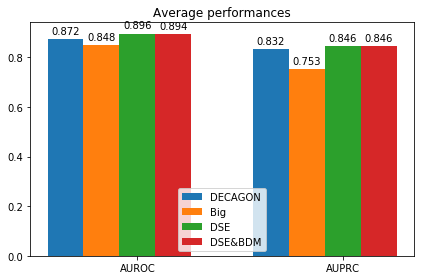

In [43]:
avg_decagon = np.array([0.872,0.832,0.803])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
labels = sims[:2]
x = 2*np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.title('Average performances')
rects1 = ax.bar(x - 2*width, avg_decagon[:2], width, label='DECAGON')
rects2 = ax.bar(x - width, avg_big[:2], width, label='Big')
rects3 = ax.bar(x, avg_dse[:2], width, label='DSE')
rects4 = ax.bar(x + width, avg_w2[:2], width, label='DSE&BDM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [44]:
AUPRC_best = np.array([0.964,0.949,0.943,0.941,0.938,0.929,0.919,0.918,0.909,0.908])
AUPRC_worst = np.array([0.679,0.680,0.693,0.694,0.695,0.705,0.707,0.711,0.712,0.712])
AUPRC = np.concatenate([AUPRC_best,AUPRC_worst])
indices = ind_best+ind_worst
names = best+worst

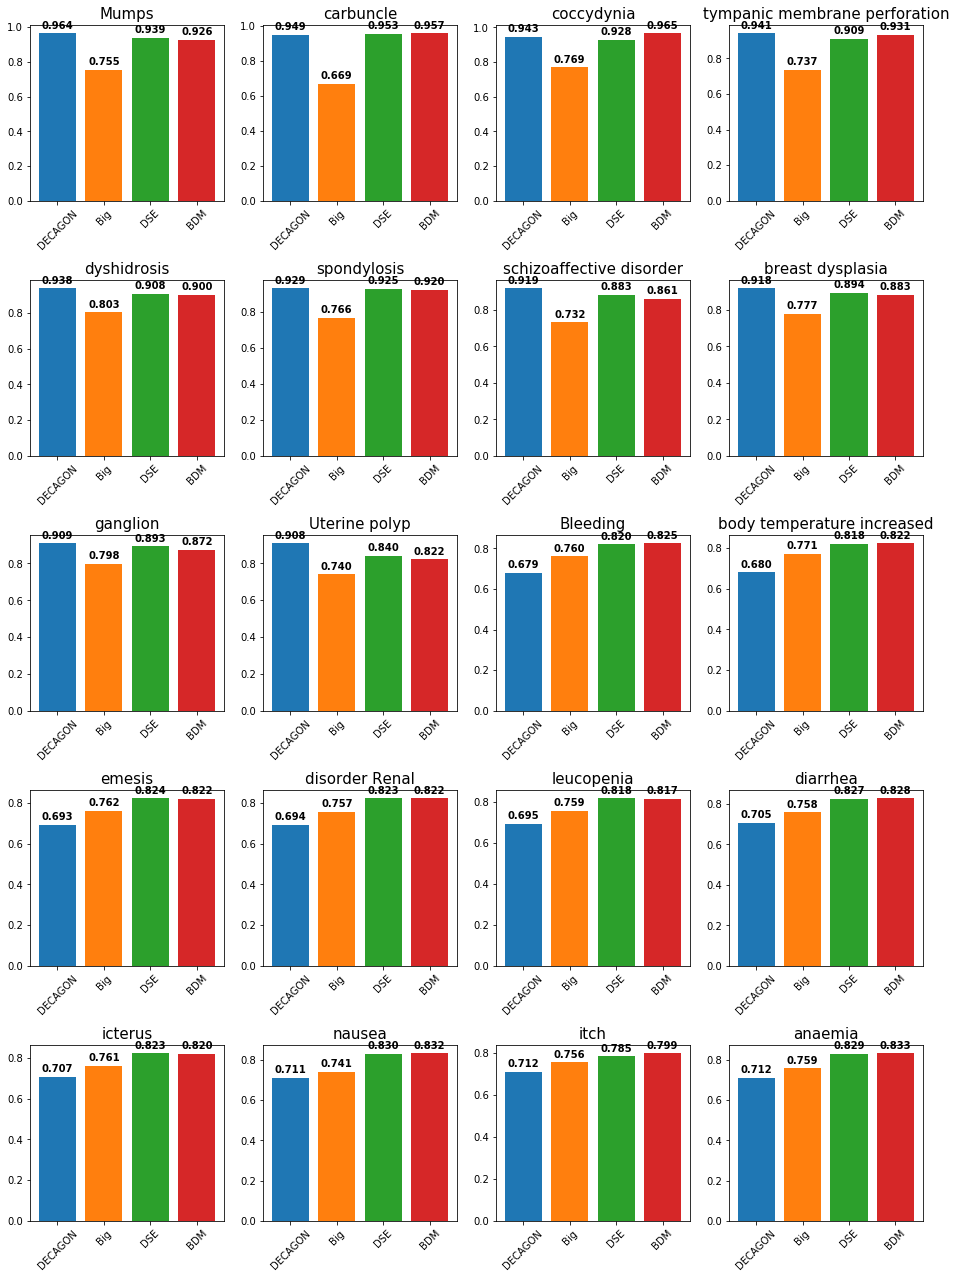

In [45]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        h = rect.get_height()
        ax[i,j].annotate('{:.3f}'.format(h),
                    xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontweight = 'bold')

n_se = len(worst)
width = 4
height = 5
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height+2])
plt.subplots_adjust(bottom=None, right=None, top=None, wspace=None, hspace=0.45)
x = [1,2,3,4]
labels = ['DECAGON','Big','DSE','BDM']
for j in range(width):
    for i in range(height):
        i_c = (width*i)+j #index of subplot from 0 to 19
        I = indices[i_c] #index of se
        ax[i,j].set_title(names[i_c],fontsize=15)
        r1 = ax[i,j].bar(x[0],AUPRC[i_c],0.8)
        r2 = ax[i,j].bar(x[1],test_big[I,1],0.8)
        r3 = ax[i,j].bar(x[2],test_dse[I,1],0.8)
        r4 = ax[i,j].bar(x[3],test_w2[I,1],0.8)
        
        ax[i,j].set_xticks(x)
        ax[i,j].set_xticklabels(labels,rotation=45)
        
        autolabel(r1)
        autolabel(r2)
        autolabel(r3)
        autolabel(r4)
        

In [46]:
total_worst = list(set(worst + last_dse + last_w2))
total_worst_idx = [name2ind[x] for x in total_worst]
print(total_worst)
print(total_worst_idx)

[u'congenital heart disease', 'icterus', u'lichen planus', u'dermatomyositis', u'Embolism pulmonary', u'Alcoholic intoxication', 'diarrhea', u'Blood Calcium Increased', 'body temperature increased', 'anaemia', u'hepatitis B', u'panniculitis', 'emesis', 'disorder Renal', 'itch', u'glucosuria', u'arteriosclerotic heart disease', u'Blepharospasm', u'sensory disturbance', u'swollen scrotum', u'atrial septal defect', 'nausea', u'MPD', u'balanitis', u'autonomic neuropathy', 'Bleeding', u'hair disease', u'ventricular septal defect', 'leucopenia', u'night cramps']
[817, 185, 815, 850, 93, 683, 9, 265, 14, 4, 734, 930, 12, 153, 74, 491, 71, 273, 364, 934, 699, 6, 956, 953, 863, 61, 853, 836, 171, 871]


IndexError: index 21 is out of bounds for axis 0 with size 20

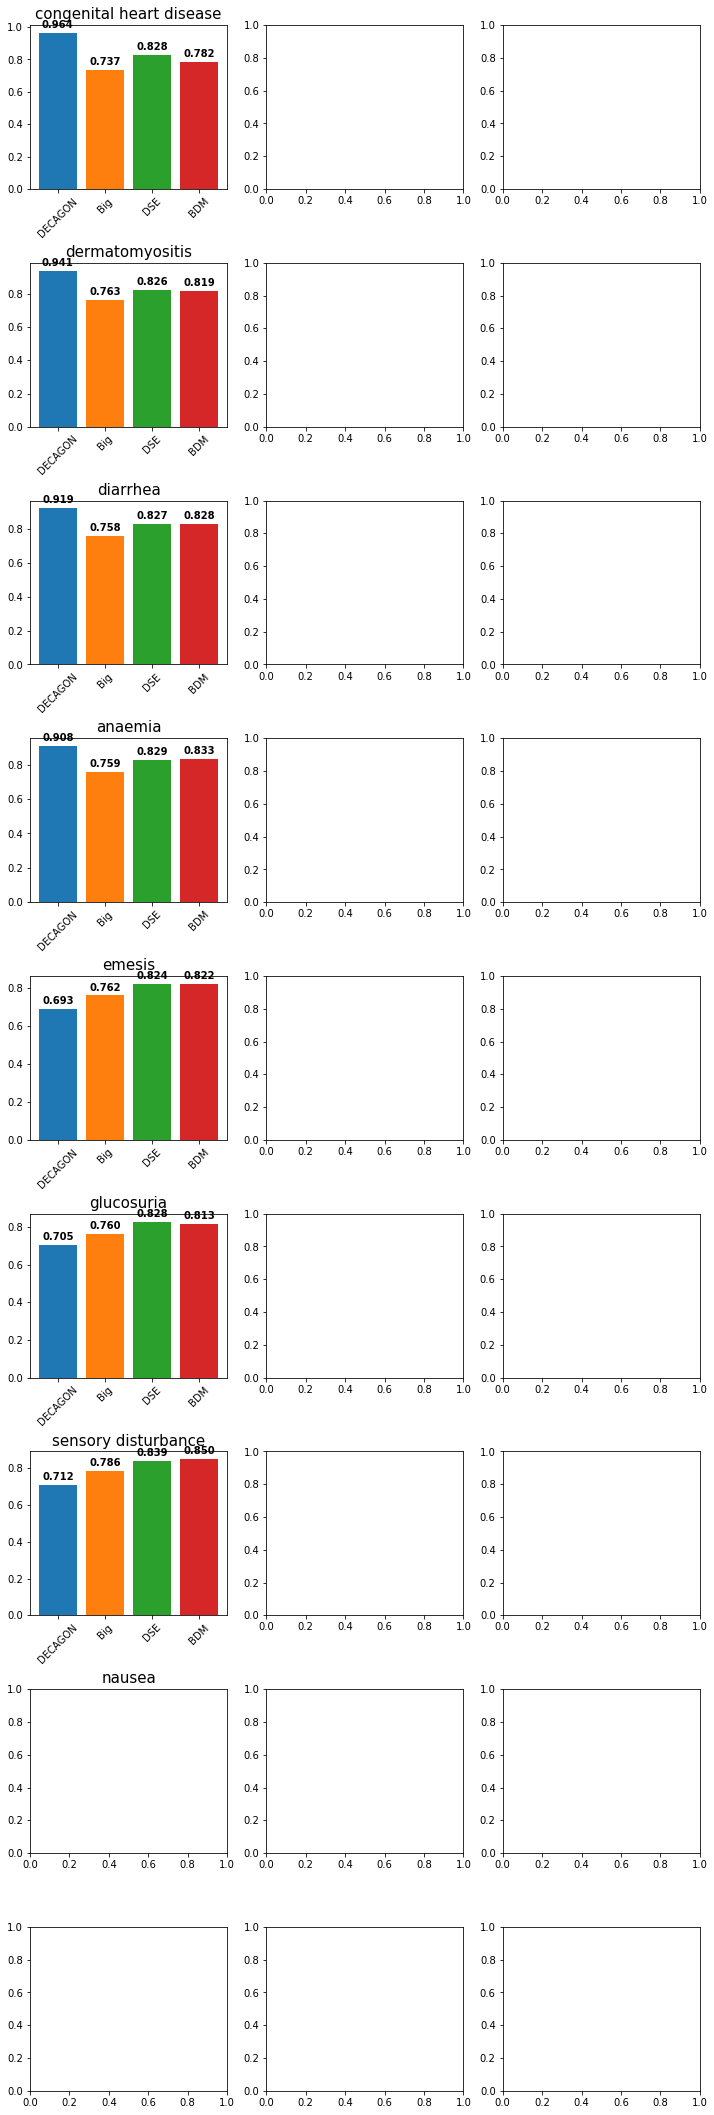

In [47]:
#CREATE A BAR PLOT SIMILAR TO ABOVE WITH WORSE OF THE 3
n_se = len(total_worst)
width = 3
height = 9
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height+2])
plt.subplots_adjust(bottom=None, right=None, top=None, wspace=None, hspace=0.45)
x = [1,2,3,4]
labels = ['DECAGON','Big','DSE','BDM']
for j in range(width):
    for i in range(height):
        i_c = (width*i)+j #index of subplot from 0 to 26
        I = total_worst_idx[i_c] #index of se
        ax[i,j].set_title(total_worst[i_c],fontsize=15)
        r1 = ax[i,j].bar(x[0],AUPRC[i_c],0.8)
        r2 = ax[i,j].bar(x[1],test_big[I,1],0.8)
        r3 = ax[i,j].bar(x[2],test_dse[I,1],0.8)
        r4 = ax[i,j].bar(x[3],test_w2[I,1],0.8)
        
        ax[i,j].set_xticks(x)
        ax[i,j].set_xticklabels(labels,rotation=45)
        
        autolabel(r1)
        autolabel(r2)
        autolabel(r3)
        autolabel(r4)

# Final Simulations: Mouse PPI

In [36]:
fm = 'results_training/TRAIN_real_genes_5092_drugs_639_se_964_epochs_50_dropout_0.1_valsize_0.15'
dsm = 'data/data_structures/DECAGON/DECAGON_real_genes_5092_drugs_639_se_964'

In [37]:
# DECAGON file for w2
with open(dsm, 'rb') as f:
    DS = pickle.load(f)
    edge2name = DS['edge2name']
    print("edge2name Imported successfully")
# Name of each side effect
r = 0
ind2name = {}
name2ind = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        ind2name[r] = edge2name[i,j][k]
        name2ind[ind2name[r]] = r
        r += 1

edge2name Imported successfully


In [38]:
ind_best = []
ind_worst = []
for i in range(len(best)):
    ind_best.append(name2ind[best[i]])
    ind_worst.append(name2ind[worst[i]])

In [39]:
with open(fm, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Epochs: ',epoch)
print('The average performances for test are:')
val_end = val_metrics[epoch-1,:,:]
t_avg = np.average(val_end,axis=0)
print('AUROC: ',"{:.4f}".format(t_avg[0]),'\tAUPRC: ',"{:.4f}".format(t_avg[1]),\
      '\tAccuracy: ',"{:.4f}".format(t_avg[2]))

epoch Imported successfully
val_metrics Imported successfully
train_metrics Imported successfully


Epochs:  12
The average performances for test are:
AUROC:  0.8924 	AUPRC:  0.8503 	Accuracy:  0.8255


Text(0.5,1,'Sorted side effect performance MOUSE simulation')

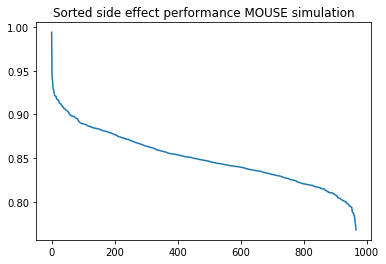

In [41]:
# Sort side effects by performance
idx =np.reshape(np.arange(len(ind2name)),[-1,1])
auprc = np.concatenate([idx,np.reshape(val_end[:,1],[-1,1])],axis=1)
auprc = auprc[auprc[:,1].argsort()[::-1]]
sorted_idx = auprc[:,0].astype(int)
n_se=10
last = sorted_idx[-n_se:][::-1]
plt.plot(auprc[:,1])
plt.title('Sorted side effect performance MOUSE simulation')

### Non-side effect edges

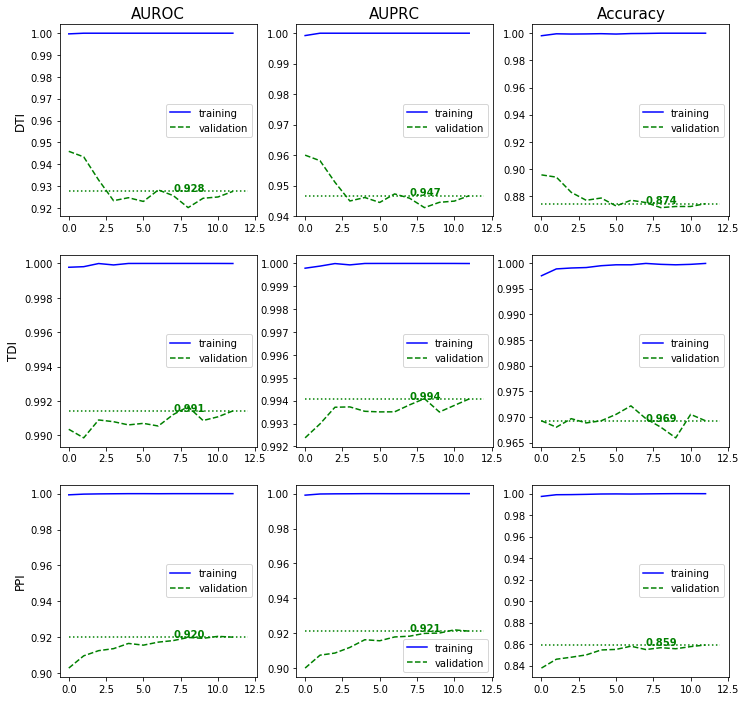

In [42]:
fig,ax = plt.subplots(3,n_sims,figsize=[4*n_sims,12])
for i in range(3):
    for j in range(n_sims):
        if i==0:
            ax[i,j].set_title(sims[j],fontsize=15)
        ax[i,j].plot(train_metrics[:epoch,i,j],'b-',label='training')
        ax[i,j].plot(val_metrics[:epoch,i,j],'g--',label='validation')
        ax[i,j].hlines(val_end[i,j],0,epoch, 'g', linestyles='dotted')
        ax[i,j].text(epoch-5,val_end[i,j],"{:.3f}".format(val_end[i,j]),color='green',\
                     fontsize=10,fontweight = 'bold')
        if j==0:
            ax[i,j].set_ylabel(ind2name[i],fontsize=12)
        ax[i,j].legend(loc='best')

### Best performing edges

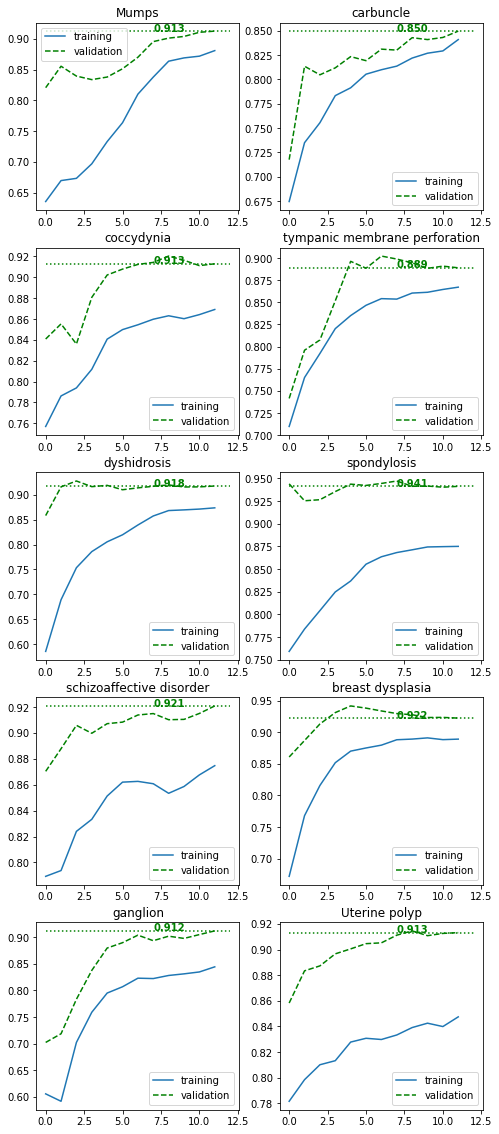

In [43]:
n_se = len(best)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_best[i_c]
        ax[i,j].set_title(best[i_c],fontsize=12)
        ax[i,j].plot(train_metrics[:epoch,I,1],'-',label='training')
        ax[i,j].plot(val_metrics[:epoch,I,1],'g--',label='validation')
        ax[i,j].hlines(val_end[I,1],0,epoch, 'g', linestyles='dotted')
        ax[i,j].text(epoch-5,val_end[I,1],"{:.3f}".format(val_end[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

### Worst performing edges

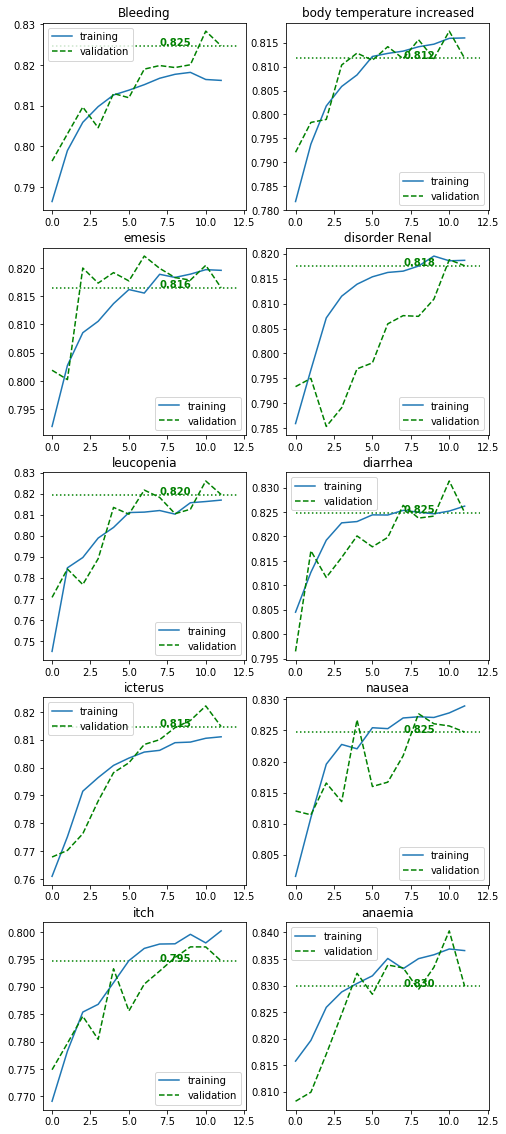

In [44]:
n_se = len(worst)
width = 2
height = int(n_se/width)
fig,ax = plt.subplots(height,width,figsize=[4*width,4*height])
for i in range(height):
    for j in range(width):
        i_c = (width*i)+j
        I = ind_worst[i_c]
        ax[i,j].set_title(worst[i_c],fontsize=12)
        ax[i,j].plot(train_metrics[:epoch,I,1],'-',label='training')
        ax[i,j].plot(val_metrics[:epoch,I,1],'g--',label='validation')
        ax[i,j].hlines(val_end[I,1],0,epoch, 'g', linestyles='dotted')
        ax[i,j].text(epoch-5,val_end[I,1],"{:.3f}".format(val_end[I,1]),color='green',\
                     fontsize=10,fontweight = 'bold')
        ax[i,j].legend(loc='best')

# ======================================

In [ ]:
f1 = 'results_training/BASE_TRAIN_real_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f2 = 'results_training/TRAIN_NOGRADreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f3 = 'results_training/TRAIN_MODELREDreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f4 = 'results_training/TRAIN_2RELUreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
filenames = [f0,f1,f2,f3,f4]

In [ ]:
time = np.zeros([5])
vms_all = np.zeros([5])
rss_all = np.zeros([5])
val_real = np.zeros([50,10,3,5])
test_real = np.zeros([10,3,5])
sims = ['gpu','base','no_grad','reduced','2ReLU']
metrics = ['AUROC','AUPRC','Accuracy']

In [ ]:
print(val_metrics.shape)

In [ ]:
time[0] = train_time
vms_all[0] = vms
rss_all[0] = rss
val_real[:,:,:,0] = val_metrics
test_real[:,:,0] = test_metrics

In [ ]:
with open(f1, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[1] = train_time
vms_all[1] = vms
rss_all[1] = rss
val_real[:,:,:,1] = val_metrics
test_real[:,:,1] = test_metrics

In [ ]:
with open(f2, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[2] = train_time
vms_all[2] = vms
rss_all[2] = rss
val_real[:,:,:,2] = val_metrics
test_real[:,:,2] = test_metrics

In [ ]:
with open(f3, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[3] = train_time
vms_all[3] = vms
rss_all[3] = rss
val_real[:,:,:,3] = val_metrics
test_real[:,:,3] = test_metrics

In [ ]:
with open(f4, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[4] = train_time
vms_all[4] = vms
rss_all[4] = rss
val_real[:,:,:,4] = val_metrics
test_real[:,:,4] = test_metrics

In [ ]:
x = np.arange(5)+1
figure(figsize=[14,5])
ax1=subplot(1,3,1)
bar(x,time/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(sims)
ax2=subplot(1,3,2)
bar(x,vms_all*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(sims)
ax3=subplot(1,3,3)
bar(x,rss_all*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(sims)
show()

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

In [ ]:
m = 0
n_se = 10
n_sim = 5
fig, axs = plt.subplots(n_se,n_sim, figsize=(20,30), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.2)
#axs = axs.ravel()
cont = 0
for i in range(n_se):
    for j in range(n_sim):
        a,b,c = idx2edge_type[cont]
        #color=next(axs[i,j]._get_lines.prop_cycler)['color']
        #axs[i,j].plot(train_real[:,i,m,j],'r',label='train')#,linewidth=3, alpha=0.6)
        axs[i,j].plot(val_real[:,i,m,j],'r', label='val')
        axs[i,j].hlines(test_real[i,m,j],0,50, 'g', linestyles='dotted', label='test')
        axs[i,j].set_title(edge2name[a,b][c]+' '+sims[j])
    cont+=1
    legend(loc='lower right')

## Unfinished result

In [ ]:
filename = 'results_training/TRAIN_INC_real_genes_19081_drugs_639_se_964_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'

In [ ]:
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
epoch

In [ ]:
figure()
for i in range(3,10):
    plot(test_real[i,1,:])

In [ ]:
train_real = np.zeros([50,10,3,5])
val_real = np.zeros([50,10,3,5])
test_real = np.zeros([10,3,5])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['no_aff','nofeat','DSE','BDM','w2']

In [ ]:
file_no_aff = 'results_training/TRAIN_real_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_no_feat = 'results_training/TRAIN_real_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_DSE = 'results_training/TRAIN_real_DSE_8120_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_BDM = 'results_training/TRAIN_real_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_w2 = 'results_training/TRAIN_real_DSE_8120_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
filenames = [file_no_aff,file_no_feat,file_DSE,file_BDM,file_w2]

In [ ]:
with open(file_no_aff, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
count = 0
for i in filenames:
    with open(i, 'rb') as f:
        print(sims[count])
        DS = pickle.load(f)
        for key in DS.keys():
            globals()[key]=DS[key]
            print(key,"Imported successfully")
    if count==0:
        test_temp = test_metrics[3,:]
        test_metrics[3:9,:] = test_metrics[4:,:]
        test_metrics[-1,:] = test_temp
        train_temp = train_metrics[:,3,:]
        train_metrics[:,3:9,:] = train_metrics[:,4:,:]
        train_metrics[:,-1,:] = train_temp
        val_temp = val_metrics[:,3,:]
        val_metrics[:,3:9,:] = val_metrics[:,4:,:]
        val_metrics[:,-1,:] = val_temp
        temp_name = edge2name[1,1][0]
        edge2name[1,1].remove(temp_name)
        edge2name[1,1].append(temp_name)
    train_real[:,:,:,count] = train_metrics
    val_real[:,:,:,count] = val_metrics
    test_real[:,:,count] = test_metrics
    count += 1
    print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
    print('Train Time:',datetime.timedelta(seconds=train_time))
    print('Virtual Memory:',vms*1e-9,'Gb')
    print('RSS Memory:',rss*1e-9,'Gb')
    print('\n')
names = edge2name

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

In [ ]:
m = 0
n_se = 10
n_sim = 5
fig, axs = plt.subplots(n_se,n_sim, figsize=(20,30), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.2)
#axs = axs.ravel()
cont = 0
for i in range(n_se):
    for j in range(n_sim):
        a,b,c = idx2edge_type[cont]
        #color=next(axs[i,j]._get_lines.prop_cycler)['color']
        #axs[i,j].plot(train_real[:,i,m,j],'r',label='train')#,linewidth=3, alpha=0.6)
        axs[i,j].plot(val_real[:,i,m,j],'r', label='val')
        axs[i,j].hlines(test_real[i,m,j],0,50, 'g', linestyles='dotted', label='test')
        axs[i,j].set_title(names[a,b][c]+' '+sims[j])
    cont+=1
    legend(loc='lower right')

In [ ]:
train_real = np.zeros([50,10,3,4])
train_docking = np.zeros([50,10,3,4])
train_binding = np.zeros([50,10,3,4])
val_real = np.zeros([50,10,3,4])
val_docking = np.zeros([50,10,3,4])
val_binding = np.zeros([50,10,3,4])
test_real = np.zeros([10,3,4])
test_docking = np.zeros([10,3,4])
test_binding = np.zeros([10,3,4])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['nofeat','DSE','BDM','w2']
modes = ['nofeat','docking','binding']

In [ ]:
for root, dirs, files in os.walk("./results_training/"):
    for fi in files:
        count=0
        words = fi.split('_')
        if '4116' in words:
            with open(root + fi, 'rb') as f:
                DS = pickle.load(f)
                print(words[2:6])
                for key in DS.keys():
                    globals()[key]=DS[key]
                    print(key,"Imported successfully")
            if 'DSE' in words and 'BDM' in words: count=3
            elif 'BDM' in words: count=2
            elif 'DSE' in words: count=1
            if 'docking' in words:
                train_dnames = edge2nameocking[:,:,:,count] = train_metrics
                val_docking[:,:,:,count] = val_metrics
                test_docking[:,:,count] = test_metrics
            elif 'binding' in words:
                train_binding[:,:,:,count] = train_metrics
                val_binding[:,:,:,count] = val_metrics
                test_binding[:,:,count] = test_metrics
            else:
                train_real[:,:,:,count] = train_metrics
                val_real[:,:,:,count] = val_metrics
                test_real[:,:,count] = test_metrics
            names = edge2name
            print(count)
            print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
            print('Train Time:',datetime.timedelta(seconds=train_time))
            print('Virtual Memory:',vms*1e-9,'Gb')
            print('RSS Memory:',rss*1e-9,'Gb')
            print('\n')

In [ ]:
train = np.concatenate([train_real.reshape(50,10,3,4,1),train_docking.reshape(50,10,3,4,1)\
                        ,train_binding.reshape(50,10,3,4,1)],axis=4)
val = np.concatenate([val_real.reshape(50,10,3,4,1),val_docking.reshape(50,10,3,4,1)\
                        ,val_binding.reshape(50,10,3,4,1)],axis=4)
test = np.concatenate([test_real.reshape(10,3,4,1),test_docking.reshape(10,3,4,1)\
                        ,test_binding.reshape(10,3,4,1)],axis=3)

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

In [ ]:
m = 1
n_se = 10
n_sim = 4
n_modes = 3
fig, axs = plt.subplots(n_se,n_sim, figsize=(12,28), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.1)
#axs = axs.ravel()
for e in range(n_se):
    i,j,k = idx2edge_type[e]
    for n in range(n_sim):
        for l in range(n_modes):
            color=next(axs[e,n]._get_lines.prop_cycler)['color']
            axs[e,n].plot(train[:,e,m,n,l],color=color,label=modes[l])#,linewidth=3, alpha=0.6)
            axs[e,n].plot(val[:,e,m,n,l],'--',color=color)
            axs[e,n].hlines(test[e,m,n,l],0,50, colors=color, linestyles='dotted')
            axs[e,n].set_title(names[i,j][k]+' '+sims[n])
    legend(loc='lower right')

## Results of 7 worst performed side effects

In [ ]:
train_real = np.zeros([50,10,3,4])
train_toy = np.zeros([50,10,3,4])
val_real = np.zeros([50,10,3,4])
val_toy = np.zeros([50,10,3,4])
test_real = np.zeros([10,3,4])
test_toy = np.zeros([10,3,4])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['nofeat','DSE','BDM','w2']

#### Real no feat

In [ ]:
filename = './results_training/TRAIN_real_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
names = edge2name
train_real[:,:,:,0] = train_metrics
val_real[:,:,:,0] = val_metrics
test_real[:,:,0] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE

In [ ]:
filename = './results_training/TRAIN_real_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,1] = train_metrics
val_real[:,:,:,1] = val_metrics
test_real[:,:,1] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,2] = train_metrics
val_real[:,:,:,2] = val_metrics
test_real[:,:,2] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real w2

In [ ]:
filename = './results_training/TRAIN_real_BDM_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,3] = train_metrics
val_real[:,:,:,3] = val_metrics
test_real[:,:,3] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy no feat

In [ ]:
filename = './results_training/TRAIN_toy_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,0] = train_metrics
val_toy[:,:,:,0] = val_metrics
test_toy[:,:,0] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy DSE

In [ ]:
filename = './results_training/TRAIN_toy_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,1] = train_metrics
val_toy[:,:,:,1] = val_metrics
test_toy[:,:,1] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy BDM

In [ ]:
filename = './results_training/TRAIN_toy_BDM_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,2] = train_metrics
val_toy[:,:,:,2] = val_metrics
test_toy[:,:,2] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy w2

In [ ]:
filename = './results_training/TRAIN_toy_BDM_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,3] = train_metrics
val_toy[:,:,:,3] = val_metrics
test_toy[:,:,3] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

In [ ]:
print(np.shape(train_real))
print(np.shape(val_real))
print(np.shape(test_real))

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

### Plotting for real

In [ ]:
m = 1
fig, axs = plt.subplots(2,5, figsize=(18, 9), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for e in range(10):
    i,j,k = idx2edge_type[e]
    for s in [1,3]:
        color=next(axs[e]._get_lines.prop_cycler)['color']
        axs[e].plot(train_real[:,e,m,s],color=color,label=sims[s])#,linewidth=3, alpha=0.6)
        axs[e].plot(val_real[:,e,m,s],'--',color=color)
        axs[e].hlines(test_real[e,m,s],0,50, colors=color, linestyles='dotted')
        axs[e].set_title(names[i,j][k])
legend(loc='lower right')

### Plotting for toy

In [ ]:
m = 1
fig, axs = plt.subplots(2,5, figsize=(18, 9), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .4, wspace=.15)
axs = axs.ravel()
for e in range(10):
    i,j,k = idx2edge_type[e]
    for s in [1,3]:
        color=next(axs[e]._get_lines.prop_cycler)['color']
        axs[e].plot(train_toy[:,e,m,s],color=color,label=sims[s])
        axs[e].plot(val_toy[:,e,m,s],'--',color=color)
        axs[e].hlines(test_toy[e,m,s],0,50, colors=color, linestyles='dotted')
        axs[e].set_title(names[i,j][k])
legend(loc='lower right')

## Results with training & validation accuracy

In [ ]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] +\
    2*['Mumps', 'carbuncle', 'coccydynia', 'Bleeding','disorder Renal', 'emesis']
ses_pairs = [(0,1),(2,3),(4,10),(5,11),(6,12),(7,13),(8,14),(9,15)]
sims = ['toy','toyDSE','toyBDM','toyw2','real','realDSE','realBDM','realw2']
sims = ['real','realDSE','realBDM','realw2']
metrics = ['AUROC','AUCPR','Val acc','Train acc']
n_ses = len(ses)
n_sims = len(sims)
epochs = 50

In [ ]:
data = np.zeros([epochs,n_ses,4,n_sims])
test_data = np.zeros([n_ses,3,n_sims])
performance = np.zeros([3,n_sims])

In [ ]:
filename = './data/data_structures/DECAGON/DECAGON_real_genes_16271_drugs_636_se_7'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
degrees[1]

# 3 best 3 worst

In [ ]:
data = np.zeros([50,16,4,4])
test_data = np.zeros([16,3,4])
performance = np.zeros([3,4])
sims = ['no_feat','DSE','BDM','w2']

In [ ]:
filename = './data/data_structures/DECAGON/DECAGON_real_genes_16266_drugs_627_se_6'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
se = se_combo_name2idx.keys()

#### Real no features

In [ ]:
filename = './temp/TRAIN_real_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,0] = val_auc.transpose()
data[:,:,1,0] = val_auprc.transpose()
data[:,:,2,0] = val_acc
data[:,:,3,0] = train_acc
test_data[:,:,0] = test_scores
performance[:,0] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE

In [ ]:
filename = './results_training/TRAIN_real_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,1] = val_auc.transpose()
data[:,:,1,1] = val_auprc.transpose()
data[:,:,2,1] = val_acc
data[:,:,3,1] = train_acc
test_data[:,:,1] = test_scores
performance[:,1] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,2] = val_auc.transpose()
data[:,:,1,2] = val_auprc.transpose()
data[:,:,2,2] = val_acc
data[:,:,3,2] = train_acc
test_data[:,:,2] = test_scores
performance[:,2] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,3] = val_auc.transpose()
data[:,:,1,3] = val_auprc.transpose()
data[:,:,2,3] = val_acc
data[:,:,3,3] = train_acc
test_data[:,:,3] = test_scores
performance[:,3] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

### Performance plots

In [ ]:
x = np.arange(4)+1
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,performance[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(sims)
ax2=subplot(1,3,2)
bar(x,performance[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(sims)
ax3=subplot(1,3,3)
bar(x,performance[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(sims)
show()

In [ ]:
m=0
figure(figsize=[15,15])
for i in range(4):
    for j in range(4):
        se = (4*i)+j
        subplot(4,4,se+1)
        for k in range(4):
            plot(data[:,se,m,k],label=sims[k])
        legend(loc='lower right')

In [ ]:
pair_idx = 5
figure(figsize=[12,12])
suptitle(ses[ses_pairs[pair_idx][0]]+' AUPRC',fontsize=16)
for i in range(n_sims):   
    subplot(2,2,i+1)
    test_val = test_data[ses_pairs[pair_idx][0],1,i]
    hlines(test_val,0,50, colors='g', linestyles='dashed', label='test')
    text(0, test_val, str(np.round(test_val,3)), fontsize=14,color='g')
    plot(data[:,ses_pairs[pair_idx][0],3,i],label='train',color='r')
    plot(data[:,ses_pairs[pair_idx][0],2,i],label='validation',color='b')
    legend(loc='best')
    title(sims[i])
show()

In [ ]:
m=0
figure(figsize=[18,15])
suptitle(metrics[m],x=0.5,y=1.25,fontsize=20)
for i in range(n_ses):
    ax = subplot(4,4,i+1)
    for j in range(n_sims):
        color=next(ax._get_lines.prop_cycler)['color']
        plot(data[:,i,m,j],label=sims[j],color=color)
        test_val = test_data[i,int(m*3/4),j]
        hlines(test_val,0,50, colors=color, linestyles='dashed')
        title(ses[i])
    legend()
subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
show()

## Data with BDM and w/o protein features

In [ ]:
new_data = np.zeros([16,21,4,4])
new_perf = np.zeros([3,4])
new_epochs = np.arange(21)

#### Real only BDM

In [ ]:
print('REAL BDM')
filename = './temp/TRAIN_real_BDM_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,0] = val_auc
new_data[:,:,1,0] = val_auprc
new_data[:,:,2,0] = val_apk
new_data[:,:,3,0] = train_cost
new_perf[:,0] = time,vms,rss

#### Real with drug features & BDM

In [ ]:
print('REAL DSE BDM')
filename = './temp/TRAIN_real_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,1] = val_auc
new_data[:,:,1,1] = val_auprc
new_data[:,:,2,1] = val_apk
new_data[:,:,3,1] = train_cost
new_perf[:,1] = time,vms,rss

#### Toy no feat

In [ ]:
print('TOY NO FEAT')
filename = './temp/TRAIN_toy_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,2] = val_auc
new_data[:,:,1,2] = val_auprc
new_data[:,:,2,2] = val_apk
new_data[:,:,3,2] = train_cost
new_perf[:,2] = time,vms,rss

#### Toy DSE BDM

In [ ]:
print('TOY DSE BDM')
filename = './temp/TRAIN_toy_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,3] = val_auc
new_data[:,:,1,3] = val_auprc
new_data[:,:,2,3] = val_apk
new_data[:,:,3,3] = train_cost
new_perf[:,3] = time,vms,rss

In [ ]:
names = ['BDM','BDM + DSE','toy','toy_w2']
m=0
figure(figsize=[15,15])
for i in range(4):
    for j in range(4):
        se = (4*i)+j
        subplot(4,4,se+1)
        for k in range(2):
            plot(new_data[se,:,m,k],label=names[k])
        legend(loc='lower right')

#### Toy with drug features & BDM

In [ ]:
print('TOY DSE')
filename = './results_training/TRAIN_toy_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,4] = val_auc
new_data[:,:,1,4] = val_auprc
new_data[:,:,2,4] = val_apk
new_data[:,:,3,4] = train_cost
new_perf[:,4] = time,vms,rss

## Toy without features

In [ ]:
print('TOY NO FEAT')
filename = './results_training/TRAIN_toy_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,2] = val_auc
new_data[:,:,1,2] = val_auprc
new_data[:,:,2,2] = val_apk
new_data[:,:,3,2] = train_cost
new_perf[:,2] = time,vms,rss

## Data from first simulations

In [ ]:
data = np.zeros([16,72,4,2])
perf = np.zeros([3,2])
epochs = np.linspace(0,20,72)

#### Real without features

In [ ]:
print('REAL NO FEAT')
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,0] = val_auc
data[:,:,1,0] = val_auprc
data[:,:,2,0] = val_apk
data[:,:,3,0] = train_cost
perf[:,0] = time,vms,rss

#### Real with Drug features

In [ ]:
print('REAL DSE')
filename = './results_training/TRAIN_real_reduced_DSE_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,1] = val_auc
data[:,:,1,1] = val_auprc
data[:,:,2,1] = val_apk
data[:,:,3,1] = train_cost
perf[:,1] = time,vms,rss

## Performance plots

In [ ]:
perf = np.concatenate((perf,new_perf),axis=1)

In [ ]:
x = np.arange(7)+1
labels = ['R','R+D','R+C','R+D+C','T','T+C','T+D+C']
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,perf[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax2=subplot(1,3,2)
bar(x,perf[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax3=subplot(1,3,3)
bar(x,perf[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
show()

## Toy data plots

In [ ]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']
sims_new = ['real BDM','real DSE+BDM', 'toy', 'toy BDM','toy DSE+BDM']
metric = ['AUROC','AUPRC','AU@50','Train cost']

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    for j in [2,3,4]:
        plot(new_data[i,:,m,j],label=sims_new[j])
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='upper left')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Real data plots

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    plot(epochs,data[i,:,m,0],label='real no feat')
    plot(epochs,data[i,:,m,1],label='real DSE')
    plot(new_epochs,new_data[i,:,m,0],label='real BDM')
    plot(new_epochs,new_data[i,:,m,1],label='real DSE+BDM')
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='lower right')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Data for presentation AlgDyn

In [ ]:
# Data structure loading
filename = './data/data_structures/DECAGON_real_reduced_DSE'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
c = np.zeros([len(adj_mats_orig[1,1])])
for i in range(len(c)):
    c[i] = np.sum(adj_mats_orig[1,1][i])
c

In [ ]:
names = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']

In [ ]:
filenames = ['reduced','reduced_DSE','reduced_DSE_PF','reduced_DSE_NPF','reduced_DSE_PF_BDM'
            ,'reduced_DSE_NPF_BDM']
titles = ['No Features','DSE','DSE + PF','DSE+NPF','BDM + PF','BDM + NPF']

In [ ]:
# Results loading
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

In [ ]:
n_files = len(titles)
idx = [0,2,4,5,6,7,8,9]
data_AUROC = np.zeros([len(idx),72,n_files])
data_AUPRC = np.zeros([len(idx),72,n_files])
for i in range(n_files):
    filename = './results_training/TRAIN_real_' + filenames[i] + '_epochs20_h164_h232_lr0.001dropout0.1'
    f = open(filename, 'rb')
    DS = pickle.load(f)
    for j in range(len(idx)):
        val_auc = DS['val_auc']
        val_auprc = DS['val_auprc']
        data_AUROC[j,:,i] = val_auc[idx[j],:]
        data_AUPRC[j,:,i] = val_auprc[idx[j],:]
    f.close()

In [ ]:
figure(figsize(20,12))
for i in range(n_files):
    subplot(2,3,i+1)
    for j in range(len(idx)):
        plot(data_AUROC[j,:,i],label=names[idx[j]])
    title(titles[i])
    legend()
show()

In [ ]:
figure(figsize(20,12))
for i in range(len(idx)):
    subplot(2,4,i+1)
    for j in range(n_files):
        plot(data_AUPRC[i,:,j],label=titles[j])
    title(names[idx[i]])
    legend()
show()

# Final performance for all networks

In [ ]:
apk_red_BDM_NPF = pd.read_csv('results_training/apk_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
apk_red_BDM_PF = pd.read_csv('results_training/apk_red_BDM_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_NPF = pd.read_csv('results_training/apk_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_PF = pd.read_csv('results_training/apk_red_DSE_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE = pd.read_csv('results_training/apk_red_DSE.txt',header=None).to_numpy().squeeze()
apk_red = pd.read_csv('results_training/apk_red.txt',header=None).to_numpy().squeeze()
apk = np.stack([apk_red,apk_red_DSE,apk_red_DSE_PF,apk_red_DSE_NPF,apk_red_BDM_PF,
                apk_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auroc_red_BDM_NPF = pd.read_csv('results_training/auroc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_BDM_PF = pd.read_csv('results_training/auroc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_NPF = pd.read_csv('results_training/auroc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_PF = pd.read_csv('results_training/auroc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE = pd.read_csv('results_training/auroc_red_DSE.txt',header=None).to_numpy().squeeze()
auroc_red = pd.read_csv('results_training/auroc_red.txt',header=None).to_numpy().squeeze()
auroc = np.stack([auroc_red,auroc_red_DSE,auroc_red_DSE_PF,auroc_red_DSE_NPF,
                  auroc_red_BDM_PF,auroc_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auprc_red_BDM_NPF = pd.read_csv('results_training/auprc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_BDM_PF = pd.read_csv('results_training/auprc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_NPF = pd.read_csv('results_training/auprc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_PF = pd.read_csv('results_training/auprc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE = pd.read_csv('results_training/auprc_red_DSE.txt',header=None).to_numpy().squeeze()
auprc_red = pd.read_csv('results_training/auprc_red.txt',header=None).to_numpy().squeeze()
auprc = np.stack([auprc_red,auprc_red_DSE,auprc_red_DSE_PF,auprc_red_DSE_NPF,
                  auprc_red_BDM_PF,auprc_red_BDM_NPF]).reshape(6,16,1)

In [ ]:
final_metrics = np.concatenate([auroc,auprc,apk],axis=2)

In [ ]:
figure(figsize=[16,8])
labels = ['no feat', 'DSE', 'DSE + PF', 'DSE + N', 'BDM + PF' , 'BDM + N']
idx2=[4,5,6,7,8,9]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
cont=1
for i in [0,2]:
    a = final_metrics[:,i,0]
    b = final_metrics[:,i,1]
    ax = subplot(1,2,cont)
    bar(x - width/2, a , width/2, label='AUROC')
    bar(x + width/2, b, width/2, label='AUPRC')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    xticks(x, labels)
    title(names[i])
    legend(loc='lower center')
    eps = 0.05
    cont+=1
    for j in range(len(a)):
        text(x[j] - width/2-eps, a[j]-eps/4, str(round(a[j],2)))#, color='blue', fontweight='bold')
        text(x[j]+width/2, b[j], str(round(b[j],2)))#, color='blue', fontweight='bold')
    
show()